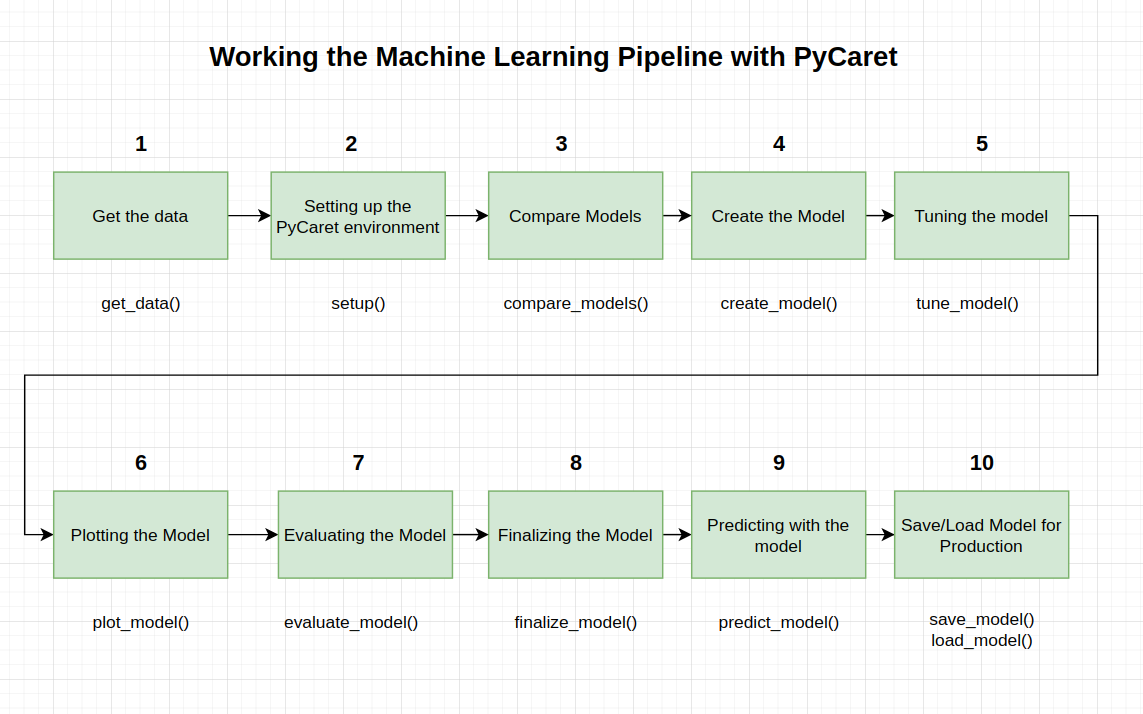

**Recreating the entire experiment without PyCaret requires more than 100 lines of code in most libraries. The library also allows you to do more advanced things, such as advanced pre-processing, ensembling, generalized stacking, and other techniques that allow you to fully customize the ML pipeline and are a must for any data scientist.**

**PyCaret is an open source, low-level library for ML with Python that allows you to go from preparing your data to deploying your model in minutes. Allows scientists and data analysts to perform iterative data science experiments from start to finish efficiently and allows them to reach conclusions faster because much less time is spent on programming. This library is very similar to Caret de R, but implemented in python**

##Installing the library 

In [5]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from pycaret.utils import enable_colab
enable_colab()


Colab mode enabled.


**The PyCaret classification module can be used for binary or multi-class classification problems. It has more than 18 algorithms and 14 plots for analyzing model performance. Whether it's hyper-parameter tuning, ensembling or advanced techniques such as stacking, PyCaret's classification module has it all.**

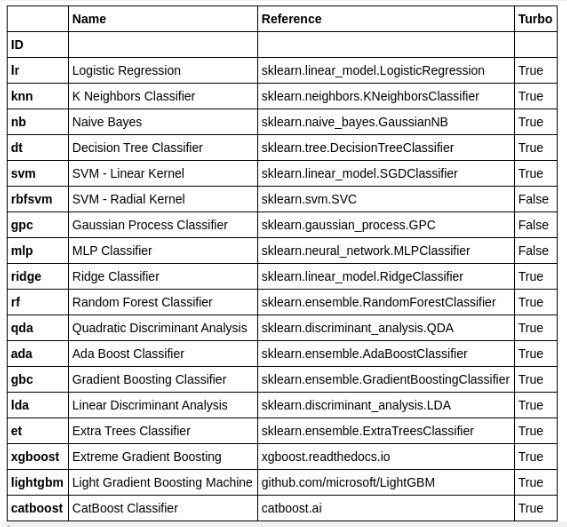

## UCI data set called Default of Credit Card Clients Dataset

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**This data set contains information about default payments, demographics, credit data, payment history and billing statements of credit card customers in Taiwan from April 2005 to September 2005. There are 24,000 samples and 25 characteristics.**

In [7]:
!pip install xlrd==1.2.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
df = pd.read_excel('/content/default of credit card clients.xls')
df.head()


Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

###Get the data

In [10]:
#Another way to obtain dataset from pycaret library

from pycaret.datasets import get_data
dataset = get_data('credit')

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0    1000.0    5000.0        0  
2    1100.0    1069.0    1000.0        0  
3    9000.0     689.0     679.0        0  
4    1000.0    1000.0     800.0        0  

[5 rows x 24 columns]

In [11]:
#check the shape of data
dataset.shape


(24000, 24)

In [12]:
## sample returns a random sample from an axis of the object. That would be 22,800 samples, not 24,000
data = dataset.sample(frac=0.95, random_state=786)
## The remain data is for testing the model with predict_model() of the pycaret library

In [13]:
data.shape

(22800, 24)

In [14]:
# we remove from the original dataset this random data
data_unseen = dataset.drop(data.index)

In [15]:
data_unseen.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
5       100000    2          2         2   23      0     -1     -1      0   
39      380000    1          2         2   32     -1     -1     -1     -1   
57      200000    2          2         1   32     -1     -1     -1     -1   
72      200000    1          1         1   53      2      2      2      2   
103     240000    1          1         2   41      1     -1     -1      0   

     PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
5        0  ...      221.0     -159.0      567.0     380.0     601.0   
39      -1  ...    32018.0    11849.0    11873.0   21540.0   15138.0   
57       2  ...     5247.0     3848.0     3151.0    5818.0      15.0   
72       2  ...   144098.0   147124.0   149531.0    6300.0    5500.0   
103      0  ...     3164.0      360.0     1737.0    2622.0    3301.0   

     PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
5         0.0     581.0    1687.0    1542.0        0  
39    24677.0   11851.0   11875.0    8251.0        0  
57     9102.0      17.0    3165.0    1395.0        0  
72     5500.0    5500.0    5000.0    5000.0        1  
103       0.0     360.0    1737.0     924.0        0  

[5 rows x 24 columns]

In [16]:
## we reset the index of both datasets
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [17]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     270000    2          1         2   34      0      0      2      0   
1     160000    2          1         2   42     -2     -2     -2     -2   
2     360000    2          1         2   30      0      0      0      0   
3      20000    2          1         2   25      0      0      0      0   
4      70000    1          2         2   29      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...    44908.0    19508.0    15860.0    4025.0       5.0   34000.0   
1     -2  ...        0.0      741.0        0.0       0.0       0.0       0.0   
2      0  ...   146117.0   145884.0   147645.0    6000.0    6000.0    4818.0   
3      0  ...    18964.0    19676.0    20116.0    1700.0    1300.0     662.0   
4      0  ...    48538.0    49034.0    49689.0    2200.0    8808.0    2200.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        0  
1     741.0       0.0       0.0        0  
2    5000.0    5000.0    4500.0        0  
3    1000.0     747.0     602.0        0  
4    2000.0    2000.0    2300.0        0  

[5 rows x 24 columns]

In [18]:
data_unseen.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     100000    2          2         2   23      0     -1     -1      0   
1     380000    1          2         2   32     -1     -1     -1     -1   
2     200000    2          2         1   32     -1     -1     -1     -1   
3     200000    1          1         1   53      2      2      2      2   
4     240000    1          1         2   41      1     -1     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      221.0     -159.0      567.0     380.0     601.0       0.0   
1     -1  ...    32018.0    11849.0    11873.0   21540.0   15138.0   24677.0   
2      2  ...     5247.0     3848.0     3151.0    5818.0      15.0    9102.0   
3      2  ...   144098.0   147124.0   149531.0    6300.0    5500.0    5500.0   
4      0  ...     3164.0      360.0     1737.0    2622.0    3301.0       0.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0     581.0    1687.0    1542.0        0  
1   11851.0   11875.0    8251.0        0  
2      17.0    3165.0    1395.0        0  
3    5500.0    5000.0    5000.0        1  
4     360.0    1737.0     924.0        0  

[5 rows x 24 columns]

### Split data


**The way we divide our data set is important because there is data that we'll not use during the modeling process, and we'll use at the end to validate our results by simulating real data. The data we use for modeling we sub-divide it in order to evaluate two scenarios, training and testing. Therefore, the following has been done**

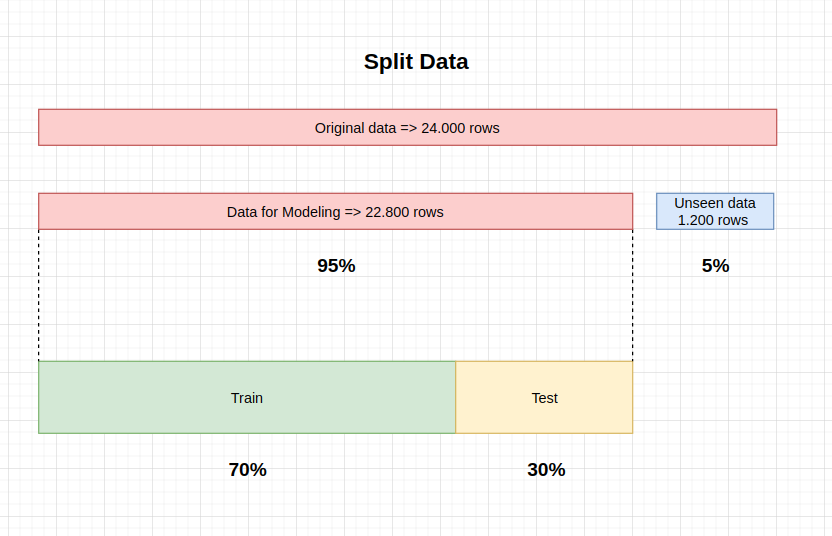

Unseen data set (also known as validation data set)
Is the data sample used to provide an unbiased assessment of a final model.
The validation data set provides the gold standard used to evaluate the model.
It is only used once the model is fully trained (using the training and test sets).
The validation set is generally what is used to evaluate the models of a competition (for example, in many Kaggle or DataSource.ai competitions, the test set is initially released along with the training and test set and the validation set is only released when the competition is about to close, and it is the result of the validation set model that decides the winner).
Many times the test set is used as the validation set, but it is not a good practice.
The validation set is generally well healed.
It contains carefully sampled data covering the various classes that the model would face, when used in the real world.
Training data set
Training data set: The data sample used to train the model.
The data set we use to train the model
The model sees and learns from this data.
Test data set
Test Data Set: The data sample used to provide an unbiased assessment of a model is matched to the training data set while adjusting the model's hyperparameters.
The assessment becomes more biased as the skill in the test data set is incorporated into the model configuration.
The test set is used to evaluate a given model, but this is for frequent evaluation.
We, as ML engineers, use this data to fine-tune the hyperparameters of the model.
Therefore, the model occasionally sees this data, but never "learns" from it.
We use the results of the test set, and update the higher level hyperparameters
So the test set impacts a model, but only indirectly.
The test set is also known as the Development set. This makes sense, since this dataset helps during the "development" stage of the model.
Confusion of terms
There is a tendency to mix up the name of test and validation.
Depending on the tutorial, the source, the book, the video or the teacher/mentor the terms are changed, the important thing is to keep the concept.
In our case we already separated the validation set at the beginning (1,200 samples of data_unseen)

##  Setting up the PyCaret environment

Now let's set up the Pycaret environment. The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. Most of this part of the configuration is done automatically, but some parameters can be set manually. For example:

The default division ratio is 70:30 (as we see in above paragraph), but can be changed with "train_size".
K-fold cross-validation is set to 10 by default
"session_id" is our classic "random_state"*


In [19]:
!pip install markupsafe==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [20]:
import jinja2


In [21]:
## setting up the environment
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [22]:
model_setup = setup(data=data, target='default', session_id=123)


Description             Value
0                               session_id               123
1                                   Target           default
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data       (22800, 24)
5                           Missing Values             False
6                         Numeric Features                14
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (15959, 88)
12                    Transformed Test Set        (6841, 88)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              72ef
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

##Compare Models

In order to understand how PyCaret compares the models and the next steps in the pipeline, it is necessary to understand the concept of N-Fold Coss-Validation.

N-Fold Coss-Validation
Calculating how much of your data should be divided into your test set is a delicate question. If your training set is too small, your algorithm may not have enough data to learn effectively. On the other hand, if your test set is too small, then your accuracy, precision, recall and F1 score could have a large variation.

You may be very lucky or very unlucky! In general, putting 70% of your data in the training set and 30% of your data in the test set is a good starting point. Sometimes your data set is so small that dividing it 70/30 will result in a large amount of variance.

One solution to this is to perform N-Fold cross-validation. The central idea here is that we are going to do this whole process N times and then average the accuracy. For example, in a 10 times cross validation, we will make the test set the first 10% of the data and calculate the accuracy, precision, recall and F1 score.

Then, we will make the cross-validation establish the second 10% of the data and we will calculate these statistics again. We can do this process 10 times, and each time the test set will be a different piece of data. Then we average all the accuracies, and we will have a better idea of how our model works on average.

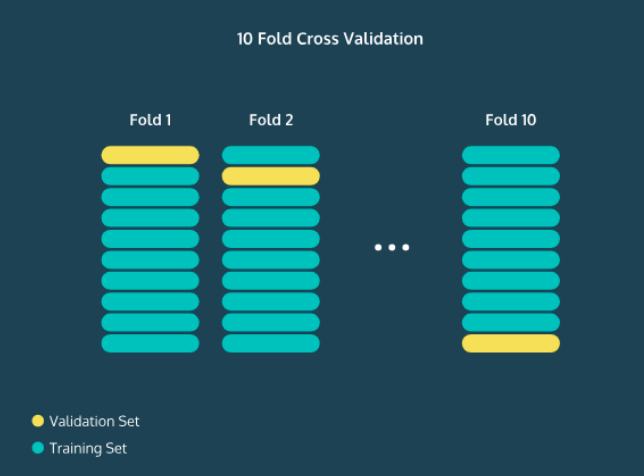

In [23]:
best_model = compare_models()


Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.8254  0.0000  0.3637  0.6913   
lda          Linear Discriminant Analysis    0.8247  0.7634  0.3755  0.6794   
gbc          Gradient Boosting Classifier    0.8226  0.7789  0.3551  0.6806   
ada                  Ada Boost Classifier    0.8221  0.7697  0.3505  0.6811   
lightgbm  Light Gradient Boosting Machine    0.8210  0.7750  0.3609  0.6679   
rf               Random Forest Classifier    0.8199  0.7598  0.3663  0.6601   
et                 Extra Trees Classifier    0.8092  0.7377  0.3677  0.6047   
lr                    Logistic Regression    0.7814  0.6410  0.0003  0.1000   
dummy                    Dummy Classifier    0.7814  0.5000  0.0000  0.0000   
knn                K Neighbors Classifier    0.7547  0.5939  0.1763  0.3719   
dt               Decision Tree Classifier    0.7293  0.6147  0.4104  0.3878   
svm                   SVM - Linear Kernel    0.7277  0.0000  0.1017  0.1671   
qda       Quadratic Discriminant Analysis    0.5098  0.5473  0.6141  0.2472   
nb                            Naive Bayes    0.3760  0.6442  0.8845  0.2441   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.4764  0.3836  0.4122     0.039  
lda       0.4835  0.3884  0.4132     0.252  
gbc       0.4664  0.3725  0.4010     4.757  
ada       0.4626  0.3690  0.3983     1.074  
lightgbm  0.4683  0.3721  0.3977     0.345  
rf        0.4707  0.3727  0.3965     2.410  
et        0.4571  0.3497  0.3657     1.803  
lr        0.0006  0.0003  0.0034     0.707  
dummy     0.0000  0.0000  0.0000     0.027  
knn       0.2388  0.1145  0.1259     0.618  
dt        0.3986  0.2242  0.2245     0.311  
svm       0.0984  0.0067  0.0075     0.273  
qda       0.3488  0.0600  0.0805     0.132  
nb        0.3826  0.0608  0.1207     0.038

In [24]:
print(best_model)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


## Create the Model

create_model is the most granular function in PyCaret and is often the basis for most of PyCaret's functionality. As its name indicates, this function trains and evaluates a model using a cross-validation that can be set with the parameter fold. The output prints a scoring table showing by Fold the Precision, AUC, Recall, F1, Kappa and MCC.

In [25]:
models()


Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [26]:
dt = create_model('dt')


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7343  0.6257  0.4327  0.4005  0.4160  0.2444  0.2447
1       0.7325  0.6277  0.4384  0.3984  0.4175  0.2443  0.2448
2       0.7431  0.6282  0.4241  0.4146  0.4193  0.2544  0.2544
3       0.7274  0.6151  0.4155  0.3856  0.4000  0.2240  0.2242
4       0.7187  0.6054  0.4040  0.3691  0.3858  0.2038  0.2042
5       0.7187  0.6014  0.3897  0.3656  0.3773  0.1958  0.1960
6       0.7206  0.6128  0.4212  0.3760  0.3973  0.2162  0.2168
7       0.7331  0.5986  0.3610  0.3830  0.3717  0.2024  0.2026
8       0.7206  0.6045  0.3983  0.3707  0.3840  0.2036  0.2038
9       0.7442  0.6272  0.4195  0.4148  0.4171  0.2533  0.2533
Mean    0.7293  0.6147  0.4104  0.3878  0.3986  0.2242  0.2245
Std     0.0092  0.0112  0.0218  0.0174  0.0173  0.0218  0.0218

In [27]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [28]:
knn = create_model('knn')
print(knn)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7469  0.6020  0.1920  0.3545  0.2491  0.1128  0.1204
1       0.7550  0.5894  0.2092  0.3883  0.2719  0.1402  0.1500
2       0.7506  0.5883  0.1576  0.3459  0.2165  0.0923  0.1024
3       0.7419  0.5818  0.1519  0.3136  0.2046  0.0723  0.0790
4       0.7563  0.5908  0.1490  0.3611  0.2110  0.0954  0.1085
5       0.7550  0.5997  0.1748  0.3720  0.2378  0.1139  0.1255
6       0.7638  0.5890  0.1891  0.4125  0.2593  0.1413  0.1565
7       0.7613  0.6240  0.1633  0.3904  0.2303  0.1163  0.1318
8       0.7619  0.5988  0.1862  0.4037  0.2549  0.1356  0.1500
9       0.7549  0.5756  0.1897  0.3771  0.2524  0.1246  0.1351
Mean    0.7547  0.5939  0.1763  0.3719  0.2388  0.1145  0.1259
Std     0.0065  0.0126  0.0191  0.0279  0.0214  0.0214  0.0230

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [29]:
rf = create_model('rf')
print(rf)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8133  0.7673  0.3610  0.6269  0.4582  0.3551  0.3749
1       0.8239  0.7615  0.3782  0.6735  0.4844  0.3882  0.4117
2       0.8258  0.7708  0.3467  0.7076  0.4654  0.3756  0.4098
3       0.8177  0.7605  0.3725  0.6436  0.4719  0.3710  0.3913
4       0.8208  0.7642  0.3725  0.6599  0.4762  0.3780  0.4006
5       0.8283  0.7638  0.3954  0.6866  0.5018  0.4070  0.4297
6       0.8127  0.7647  0.3582  0.6250  0.4554  0.3522  0.3721
7       0.8283  0.7390  0.3553  0.7168  0.4751  0.3861  0.4202
8       0.8108  0.7496  0.3610  0.6146  0.4549  0.3496  0.3678
9       0.8176  0.7565  0.3621  0.6462  0.4641  0.3645  0.3867
Mean    0.8199  0.7598  0.3663  0.6601  0.4707  0.3727  0.3965
Std     0.0062  0.0089  0.0131  0.0335  0.0139  0.0172  0.0202

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


## Tunning the Model

When creating a model using the create_model() function the default hyperparameters are used to train the model. To tune the hyperparameters the tune_model() function is used. This function automatically tunes the hyperparameters of a model using the Random Grid Search in a predefined search space.

The output prints a score grid showing the accuracy, AUC, Recall, Precision, F1, Kappa and MCC by Fold for the best model. To use a custom search grid, you can pass the custom_grid parameter in the tune_model function

In [30]:
tuned_rf = tune_model(rf)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8158  0.7508  0.3181  0.6647  0.4302  0.3363  0.3689
1       0.8283  0.7675  0.3295  0.7419  0.4563  0.3719  0.4152
2       0.8139  0.7337  0.3181  0.6529  0.4277  0.3321  0.3628
3       0.8246  0.7588  0.3095  0.7347  0.4355  0.3514  0.3976
4       0.8170  0.7567  0.3438  0.6557  0.4511  0.3539  0.3805
5       0.8258  0.7506  0.3324  0.7205  0.4549  0.3676  0.4067
6       0.8170  0.7530  0.3324  0.6629  0.4427  0.3474  0.3771
7       0.8221  0.7507  0.3381  0.6901  0.4538  0.3621  0.3951
8       0.8177  0.7201  0.2980  0.6933  0.4168  0.3286  0.3699
9       0.8207  0.7484  0.3132  0.6987  0.4325  0.3439  0.3831
Mean    0.8203  0.7490  0.3233  0.6915  0.4402  0.3495  0.3857
Std     0.0045  0.0126  0.0135  0.0310  0.0129  0.0140  0.0165

If we compare the Accuracy metrics of this refined RandomForestClassifier model with the previous RandomForestClassifier, we see a difference, because it went from an Accuracy of 0.8199 to an Accuracy of 0.8203.



In [31]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


## Plotting the Model

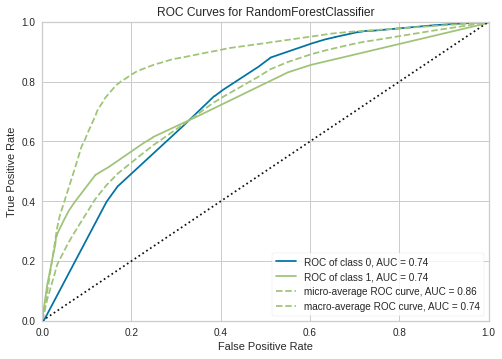

In [32]:
## AUC Plot

plot_model(tuned_rf, plot = 'auc')

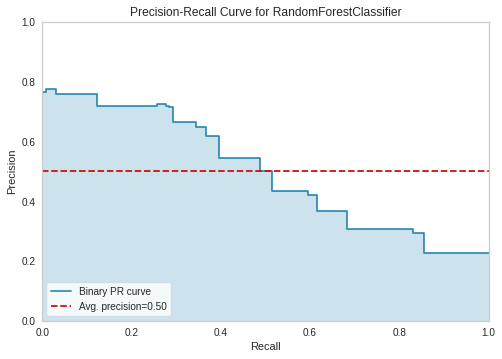

In [33]:
## Precision-recall curve

plot_model(tuned_rf, plot = 'pr')

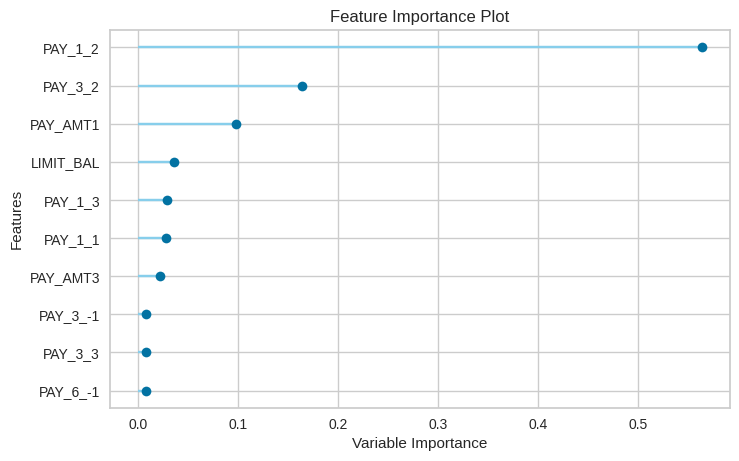

In [34]:
## feature importance

plot_model(tuned_rf, plot='feature')

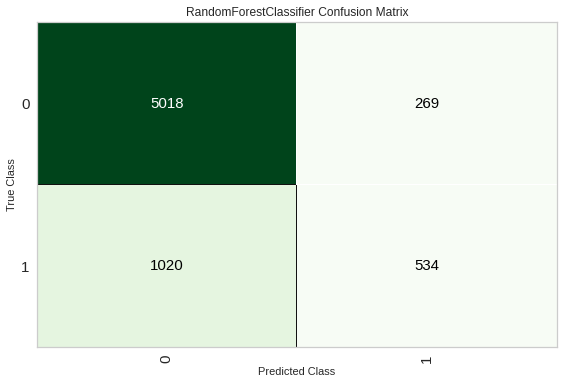

In [35]:
## Consufion matrix

plot_model(tuned_rf, plot = 'confusion_matrix')

##Evaluation the model

In [36]:
evaluate_model(tuned_rf)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##Finalizing the Model

In [37]:
final_rf = finalize_model(tuned_rf)


In [38]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


##Predicting with the model

In [39]:
predict_model(final_rf)


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.8184  0.7526  0.3533  0.6985  0.4692  0.3736   

      MCC  
0  0.4053

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       80000.0  29.0     6228.0      589.0      390.0      390.0      390.0   
1      180000.0  30.0   149069.0   152317.0   156282.0   161163.0   172190.0   
2      100000.0  26.0    18999.0    23699.0     9390.0     5781.0     8065.0   
3      500000.0  36.0      396.0     1043.0    19230.0   116696.0   194483.0   
4      190000.0  47.0   192493.0   193297.0   193400.0   193278.0   192956.0   
...         ...   ...        ...        ...        ...        ...        ...   
6836   120000.0  44.0    75294.0    76465.0    74675.0    79629.0    77748.0   
6837    50000.0  26.0    47095.0    48085.0    49039.0    49662.0        0.0   
6838    80000.0  39.0    46401.0    39456.0    30712.0    29629.0    28241.0   
6839   200000.0  33.0    50612.0    10537.0     5552.0     2506.0     9443.0   
6840   210000.0  35.0    25806.0     5861.0     1666.0     1010.0      300.0   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  \
0         383.0     589.0     390.0  ...      0.0      0.0      0.0      0.0   
1      148963.0    7500.0    8000.0  ...      1.0      0.0      0.0      0.0   
2       17277.0    5129.0    1227.0  ...      0.0      0.0      0.0      0.0   
3      195454.0    1043.0   19230.0  ...      0.0      0.0      0.0      0.0   
4      193039.0    7200.0    7222.0  ...      0.0      0.0      0.0      0.0   
...         ...       ...       ...  ...      ...      ...      ...      ...   
6836    82497.0    3000.0       0.0  ...      1.0      0.0      0.0      0.0   
6837        0.0    2073.0    2027.0  ...      0.0      0.0      0.0      0.0   
6838    28030.0    1560.0    1421.0  ...      0.0      0.0      0.0      0.0   
6839    11818.0   10023.0      27.0  ...      0.0      0.0      0.0      0.0   
6840      300.0    1035.0    1666.0  ...      0.0      0.0      0.0      0.0   

      PAY_6_6  PAY_6_7  PAY_6_8  default  Label   Score  
0         0.0      0.0      0.0        0      0  0.8051  
1         0.0      0.0      0.0        1      0  0.9121  
2         0.0      0.0      0.0        0      0  0.8051  
3         0.0      0.0      0.0        0      0  0.9121  
4         0.0      0.0      0.0        0      0  0.9121  
...       ...      ...      ...      ...    ...     ...  
6836      0.0      0.0      0.0        1      1  0.5013  
6837      0.0      0.0      0.0        0      0  0.8603  
6838      0.0      0.0      0.0        0      0  0.8051  
6839      0.0      0.0      0.0        0      0  0.8051  
6840      0.0      0.0      0.0        0      0  0.9121  

[6841 rows x 91 columns]

In [40]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.8167  0.7768  0.3612  0.6463  0.4634  0.3634   

      MCC  
0  0.3857

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     100000    2          2         2   23      0     -1     -1      0   
1     380000    1          2         2   32     -1     -1     -1     -1   
2     200000    2          2         1   32     -1     -1     -1     -1   
3     200000    1          1         1   53      2      2      2      2   
4     240000    1          1         2   41      1     -1     -1      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...      567.0     380.0     601.0       0.0     581.0    1687.0   
1     -1  ...    11873.0   21540.0   15138.0   24677.0   11851.0   11875.0   
2      2  ...     3151.0    5818.0      15.0    9102.0      17.0    3165.0   
3      2  ...   149531.0    6300.0    5500.0    5500.0    5500.0    5000.0   
4      0  ...     1737.0    2622.0    3301.0       0.0     360.0    1737.0   

   PAY_AMT6  default  Label   Score  
0    1542.0        0      0  0.8051  
1    8251.0        0      0  0.9121  
2    1395.0        0      0  0.8051  
3    5000.0        1      1  0.7911  
4     924.0        0      0  0.9121  

[5 rows x 26 columns]

##Save/Load Model for Production


In [44]:
save_model(final_rf, '/content/FinalRFModel')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

In [45]:
saved_final_rf = load_model('/content/FinalRFModel')


Transformation Pipeline and Model Successfully Loaded


In [46]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.8167  0.7768  0.3612  0.6463  0.4634  0.3634   

      MCC  
0  0.3857

In [47]:
new_prediction.head()


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     100000    2          2         2   23      0     -1     -1      0   
1     380000    1          2         2   32     -1     -1     -1     -1   
2     200000    2          2         1   32     -1     -1     -1     -1   
3     200000    1          1         1   53      2      2      2      2   
4     240000    1          1         2   41      1     -1     -1      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...      567.0     380.0     601.0       0.0     581.0    1687.0   
1     -1  ...    11873.0   21540.0   15138.0   24677.0   11851.0   11875.0   
2      2  ...     3151.0    5818.0      15.0    9102.0      17.0    3165.0   
3      2  ...   149531.0    6300.0    5500.0    5500.0    5500.0    5000.0   
4      0  ...     1737.0    2622.0    3301.0       0.0     360.0    1737.0   

   PAY_AMT6  default  Label   Score  
0    1542.0        0      0  0.8051  
1    8251.0        0      0  0.9121  
2    1395.0        0      0  0.8051  
3    5000.0        1      1  0.7911  
4     924.0        0      0  0.9121  

[5 rows x 26 columns]

\ref : https://www.datasource.ai/uploads/624e8836466a40923b64b901b5050c0f.html?utm_medium=social&utm_source=linkedin&utm_campaign=postfity&utm_content=postfity447df